<a href="https://colab.research.google.com/github/pankajti/wqu/blob/main/DL2/Gwp2_grp3941.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Step 1

In [ ]:
import yfinance as yf
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from keras.callbacks import EarlyStopping
from sklearn.preprocessing import MinMaxScaler
from keras import Sequential
from keras.callbacks import EarlyStopping


In [ ]:
ticker_names = ['SPY', 'TLT', 'SHY', 'GLD', 'DBO']
#ticker_names = ['SPY']

In [ ]:
tickers_yf = yf.Tickers(ticker_names)
tickers_df = tickers_yf.history(start='2018-01-01', end = '2022-12-30')

[*********************100%%**********************]  5 of 5 completed


In [ ]:
tickers_df

Capital Gains                          Close              \
                     DBO  GLD  SHY  SPY  TLT        DBO         GLD   
Date                                                                  
2018-01-02           0.0  0.0  0.0  0.0  0.0   9.797762  125.150002   
2018-01-03           0.0  0.0  0.0  0.0  0.0  10.009295  124.820000   
2018-01-04           0.0  0.0  0.0  0.0  0.0  10.028524  125.459999   
2018-01-05           0.0  0.0  0.0  0.0  0.0   9.980449  125.330002   
2018-01-08           0.0  0.0  0.0  0.0  0.0  10.038139  125.309998   
...                  ...  ...  ...  ...  ...        ...         ...   
2022-12-22           0.0  0.0  0.0  0.0  0.0  14.640000  166.759995   
2022-12-23           0.0  0.0  0.0  0.0  0.0  15.000000  167.259995   
2022-12-27           0.0  0.0  0.0  0.0  0.0  15.110000  168.669998   
2022-12-28           0.0  0.0  0.0  0.0  0.0  14.950000  167.910004   
2022-12-29           0.0  0.0  0.0  0.0  0.0  14.880000  168.850006   

                                               ... Stock Splits            \
                  SHY         SPY         TLT  ...          DBO  GLD  SHY   
Date                                           ...                          
2018-01-02  77.229553  244.918594  110.790878  ...          0.0  0.0  0.0   
2018-01-03  77.229553  246.467819  111.320595  ...          0.0  0.0  0.0   
2018-01-04  77.192719  247.506622  111.302902  ...          0.0  0.0  0.0   
2018-01-05  77.192719  249.156006  110.985092  ...          0.0  0.0  0.0   
2018-01-08  77.192719  249.611633  110.914467  ...          0.0  0.0  0.0   
...               ...         ...         ...  ...          ...  ...  ...   
2022-12-22  79.868927  377.868866  101.506241  ...          0.0  0.0  0.0   
2022-12-23  79.829674  380.042480  100.018112  ...          0.0  0.0  0.0   
2022-12-27  79.721672  378.543793   98.040466  ...          0.0  0.0  0.0   
2022-12-28  79.721672  373.839264   97.462837  ...          0.0  0.0  0.0   
2022-12-29  79.780594  380.568512   98.569138  ...          0.0  0.0  0.0   

                      Volume                                          
            SPY  TLT     DBO       GLD      SHY        SPY       TLT  
Date                                                                  
2018-01-02  0.0  0.0  155000  11762500  1786000   86655700  16238200  
2018-01-03  0.0  0.0  216000   7904300  1040900   90070400   8605100  
2018-01-04  0.0  0.0  184600   7329700   955400   80636400   9217900  
2018-01-05  0.0  0.0  307700   5739900   850600   83524000  10915400  
2018-01-08  0.0  0.0  183400   3566700   597700   57319200   8850600  
...         ...  ...     ...       ...      ...        ...       ...  
2022-12-22  0.0  0.0  355100   5672700  6612800  100120900  11322500  
2022-12-23  0.0  0.0  374500   2912300  2737200   59857300  15408900  
2022-12-27  0.0  0.0  585500   6885700  3969500   51638200  26475700  
2022-12-28  0.0  0.0  439000   3662500  4308900   70911500  17302900  
2022-12-29  0.0  0.0  284900   3345900  4149000   66970900  16593000  

[1258 rows x 40 columns]

In [ ]:
tickers_close_df= tickers_df.Close


In [ ]:
def get_data(time_series, lags, pred_ahead):
  ts_data = pd.DataFrame()
  ts_data['t']=time_series
  for l in range(1,lags+1) :
    ts_data[f't_{l}'] = time_series.shift(l)

  X= ts_data.iloc[:,1:]
  y=time_series.shift(-pred_ahead)
  X=X[lags:-pred_ahead]
  y=y[lags:-pred_ahead]
  return X,y

## Step 2

In [ ]:
def get_model():
  model = tf.keras.models.Sequential(
      [
          tf.keras.layers.SimpleRNN(
              50, return_sequences=True, input_shape=(X_train.shape[1], 1)
          ),
          tf.keras.layers.Dropout(0.2),
          tf.keras.layers.LSTM(50, return_sequences=True),
          tf.keras.layers.Dropout(0.2),
          tf.keras.layers.LSTM(50, return_sequences=True),
          tf.keras.layers.Dropout(0.2),
          tf.keras.layers.LSTM(50, return_sequences=False),
          tf.keras.layers.Dropout(0.2),
          tf.keras.layers.Dense(10),
          tf.keras.layers.Dense(1),
      ],name=
  )
  return model

In [ ]:
def get_model_2(name):
  SEED = 1234

  units_lstm = 50
  n_dropout = 0.2
  act_fun = "relu"
  n_features=1



  model = tf.keras.models.Sequential(name=name)

  model.add(
      tf.keras.layers.LSTM(
          units=units_lstm,
          return_sequences=True,
          activation="tanh",
          input_shape=(X_train.shape[1], n_features),
      )
  )
  model.add(tf.keras.layers.LSTM(units=units_lstm, return_sequences=True, activation="tanh"))
  model.add(tf.keras.layers.Dropout(n_dropout, seed=SEED))


  model.add(tf.keras.layers.LSTM(units=units_lstm, return_sequences=True, activation="tanh"))
  model.add(tf.keras.layers.Dropout(n_dropout, seed=SEED))


  model.add(tf.keras.layers.LSTM(units=units_lstm, return_sequences=False, activation="tanh"))
  model.add(tf.keras.layers.Dropout(n_dropout, seed=SEED))

  model.add(tf.keras.layers.Dense(units=20, activation=act_fun))
  model.add(tf.keras.layers.Dropout(n_dropout, seed=SEED))

  model.add(tf.keras.layers.Dense(units=10, activation=act_fun))
  model.add(tf.keras.layers.Dropout(n_dropout, seed=SEED))

  model.add(tf.keras.layers.Dense(1))
  return model

In [ ]:
def run_model(model, X_train,y_train):
  hp_lr = 1e-4
  model.compile(
      optimizer=tf.keras.optimizers.Adam(learning_rate=hp_lr), loss="mean_absolute_error"
  )
  es = EarlyStopping(
      monitor="val_loss", mode="min", verbose=1, patience=10, restore_best_weights=True
  )
  # fit the models
  model.fit(
      X_train,
      y_train,
      validation_split=0.2,
      epochs=500,
      batch_size=64,
      verbose=1,
      callbacks=[es],
  )

In [ ]:
def plot_return(model,X_test,y_test):
  y_pred= model.predict(X_test)
  y_pred=pd.Series(y_pred.reshape(y_pred.shape[0]))
  df_predictions=pd.DataFrame()
  df_predictions["values"]=y_pred
  df_predictions['Date']=y_test.index
  df_predictions["Positions"] = y_pred.apply(np.sign)
  df_predictions["Strat_ret"] = (
      df_predictions["Positions"].shift(1) * df_predictions["values"]
  )
  df_predictions["CumRet"] = (
      df_predictions["Strat_ret"].expanding().apply(lambda x: np.prod(1 + x) - 1)
  )
  df_predictions["bhRet"] = (
      df_predictions["values"].expanding().apply(lambda x: np.prod(1 + x) - 1)
  )

  Final_Return = np.prod(1 + df_predictions["Strat_ret"]) - 1
  Buy_Return = np.prod(1 + df_predictions["values"]) - 1

  print("Strat Return =", Final_Return * 100, "%")
  print("Buy and Hold Return =", Buy_Return * 100, "%")


  ax = plt.gca()
  df_predictions.plot(x="Date", y="bhRet", ax=ax)
  df_predictions.plot(x="Date", y="CumRet", ax=ax)
  plt.show()

In [ ]:
df_ret = tickers_close_df.SPY.pct_change().dropna()
X,y=get_data(df_ret,20,30)
X_train , X_test, y_train , y_test = train_test_split(X,y, test_size = .2, shuffle=False, )
model_spy=get_model_2('mosel_SPY')
run_model(model_spy, X_train,y_train)


Epoch 1/500
13/13 [==============================] - 19s 222ms/step - loss: 0.0087 - val_loss: 0.0058
Epoch 2/500
13/13 [==============================] - 0s 27ms/step - loss: 0.0087 - val_loss: 0.0057
Epoch 3/500
13/13 [==============================] - 0s 21ms/step - loss: 0.0087 - val_loss: 0.0058
Epoch 4/500
13/13 [==============================] - 0s 23ms/step - loss: 0.0086 - val_loss: 0.0057
Epoch 5/500
13/13 [==============================] - 0s 22ms/step - loss: 0.0087 - val_loss: 0.0057
Epoch 6/500
13/13 [==============================] - 0s 29ms/step - loss: 0.0087 - val_loss: 0.0058
Epoch 7/500
13/13 [==============================] - 0s 25ms/step - loss: 0.0087 - val_loss: 0.0057
Epoch 8/500
13/13 [==============================] - 0s 28ms/step - loss: 0.0087 - val_loss: 0.0057
Epoch 9/500
13/13 [==============================] - 0s 25ms/step - loss: 0.0086 - val_loss: 0.0057
Epoch 10/500
13/13 [==============================] - 0s 25ms/step - loss: 0.0087 - val_loss: 0.00

8/8 [==============================] - 1s 4ms/step
Strat Return = 37.1982216835022 %
Buy and Hold Return = 37.37837076187134 %


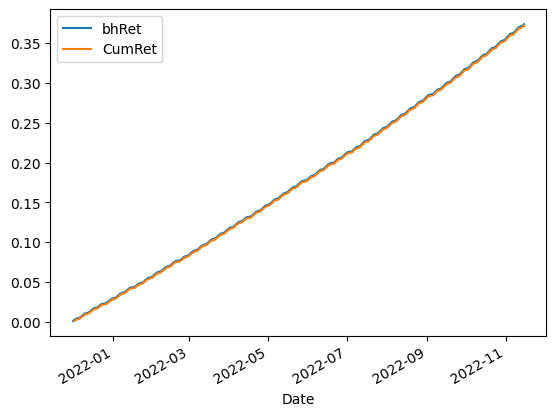

In [ ]:
plot_return(model_spy,X_test,y_test)

In [ ]:
tickers_close_df.columns

Index(['DBO', 'GLD', 'SHY', 'SPY', 'TLT'], dtype='object')

In [ ]:
df_ret = tickers_close_df.DBO.pct_change().dropna()
X,y=get_data(df_ret,20,30)
X_train , X_test, y_train , y_test = train_test_split(X,y, test_size = .2, shuffle=False, )
model_dbo=get_model_2()
run_model(model_dbo, X_train,y_train)
y_dbo_pred= model_dbo.predict(X)
y_dbo_pred

Epoch 1/500
13/13 [==============================] - 9s 126ms/step - loss: 0.0151 - val_loss: 0.0138
Epoch 2/500
13/13 [==============================] - 0s 22ms/step - loss: 0.0151 - val_loss: 0.0139
Epoch 3/500
13/13 [==============================] - 0s 25ms/step - loss: 0.0151 - val_loss: 0.0139
Epoch 4/500
13/13 [==============================] - 0s 26ms/step - loss: 0.0150 - val_loss: 0.0138
Epoch 5/500
13/13 [==============================] - 0s 23ms/step - loss: 0.0150 - val_loss: 0.0138
Epoch 6/500
13/13 [==============================] - 0s 18ms/step - loss: 0.0150 - val_loss: 0.0140
Epoch 7/500
13/13 [==============================] - 0s 14ms/step - loss: 0.0151 - val_loss: 0.0138
Epoch 8/500
13/13 [==============================] - 0s 13ms/step - loss: 0.0150 - val_loss: 0.0139
Epoch 9/500
13/13 [==============================] - 0s 15ms/step - loss: 0.0150 - val_loss: 0.0138
Epoch 10/500
13/13 [==============================] - 0s 13ms/step - loss: 0.0152 - val_loss: 0.013

array([[0.00350934],
       [0.00352277],
       [0.00351424],
       ...,
       [0.0034979 ],
       [0.00350363],
       [0.00347005]], dtype=float32)

8/8 [==============================] - 0s 4ms/step
Strat Return = 134.18984413146973 %
Buy and Hold Return = 134.99042987823486 %


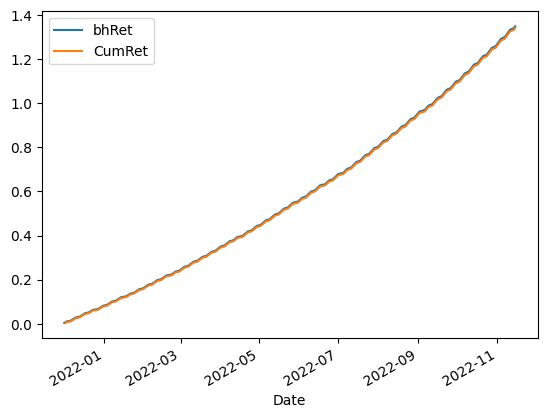

In [ ]:
plot_return(model_dbo,X_test,y_test)

In [ ]:
df_ret = tickers_close_df.GLD.pct_change().dropna()
X,y=get_data(df_ret,20,30)
X_train , X_test, y_train , y_test = train_test_split(X,y, test_size = .2, shuffle=False, )
model_gld=get_model_2()
run_model(model_gld, X_train,y_train)
y_gld_pred= model_gld.predict(X)
y_gld_pred

Epoch 1/500
13/13 [==============================] - 14s 122ms/step - loss: 0.0066 - val_loss: 0.0058
Epoch 2/500
13/13 [==============================] - 0s 13ms/step - loss: 0.0065 - val_loss: 0.0059
Epoch 3/500
13/13 [==============================] - 0s 14ms/step - loss: 0.0065 - val_loss: 0.0058
Epoch 4/500
13/13 [==============================] - 0s 14ms/step - loss: 0.0065 - val_loss: 0.0059
Epoch 5/500
13/13 [==============================] - 0s 14ms/step - loss: 0.0065 - val_loss: 0.0059
Epoch 6/500
13/13 [==============================] - 0s 33ms/step - loss: 0.0065 - val_loss: 0.0059
Epoch 7/500
13/13 [==============================] - 1s 47ms/step - loss: 0.0065 - val_loss: 0.0059
Epoch 8/500
13/13 [==============================] - 0s 28ms/step - loss: 0.0065 - val_loss: 0.0059
Epoch 9/500
13/13 [==============================] - 0s 23ms/step - loss: 0.0065 - val_loss: 0.0059
Epoch 10/500
13/13 [==============================] - 0s 14ms/step - loss: 0.0065 - val_loss: 0.00

array([[0.00042763],
       [0.0004277 ],
       [0.00042694],
       ...,
       [0.00043017],
       [0.00043078],
       [0.00043117]], dtype=float32)

8/8 [==============================] - 0s 5ms/step
Strat Return = 10.810601711273193 %
Buy and Hold Return = 10.857546329498291 %


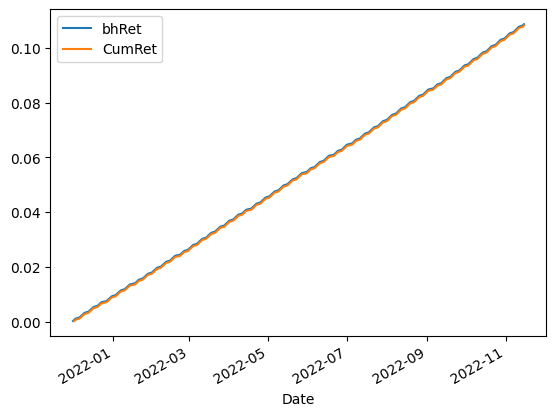

In [ ]:
plot_return(model_gld,X_test,y_test)

In [ ]:
df_ret = tickers_close_df.SHY.pct_change().dropna()
X,y=get_data(df_ret,20,30)
X_train , X_test, y_train , y_test = train_test_split(X,y, test_size = .2, shuffle=False, )
model_shy=get_model_2()
run_model(model_shy, X_train,y_train)
y_shy_pred= model_shy.predict(X)
y_shy_pred

Epoch 1/500
13/13 [==============================] - 11s 122ms/step - loss: 5.6848e-04 - val_loss: 3.4898e-04
Epoch 2/500
13/13 [==============================] - 0s 13ms/step - loss: 4.8047e-04 - val_loss: 3.5304e-04
Epoch 3/500
13/13 [==============================] - 0s 14ms/step - loss: 4.6739e-04 - val_loss: 3.8638e-04
Epoch 4/500
13/13 [==============================] - 0s 14ms/step - loss: 4.5067e-04 - val_loss: 3.4378e-04
Epoch 5/500
13/13 [==============================] - 0s 13ms/step - loss: 4.4437e-04 - val_loss: 3.5365e-04
Epoch 6/500
13/13 [==============================] - 0s 14ms/step - loss: 4.4088e-04 - val_loss: 3.6411e-04
Epoch 7/500
13/13 [==============================] - 0s 14ms/step - loss: 4.4220e-04 - val_loss: 3.5017e-04
Epoch 8/500
13/13 [==============================] - 0s 13ms/step - loss: 4.4093e-04 - val_loss: 3.5917e-04
Epoch 9/500
13/13 [==============================] - 0s 17ms/step - loss: 4.4105e-04 - val_loss: 3.5909e-04
Epoch 10/500
13/13 [======

array([[9.829619e-06],
       [9.829619e-06],
       [9.829619e-06],
       ...,
       [9.829619e-06],
       [9.829619e-06],
       [9.829619e-06]], dtype=float32)

8/8 [==============================] - 0s 4ms/step
Strat Return = 0.2355813980102539 %
Buy and Hold Return = 0.2365589141845703 %


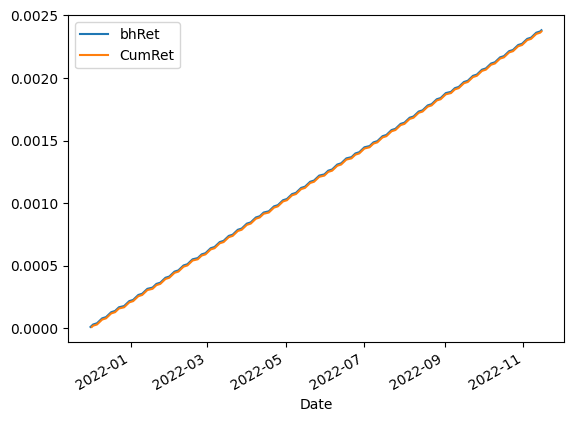

In [ ]:
plot_return(model_shy,X_test,y_test)

In [ ]:
df_ret = tickers_close_df.TLT.pct_change().dropna()
X,y=get_data(df_ret,20,30)
X_train , X_test, y_train , y_test = train_test_split(X,y, test_size = .2, shuffle=False, )
model_tlt=get_model_2()
run_model(model_tlt, X_train,y_train)
y_tlt_pred= model_tlt.predict(X)
y_tlt_pred

Epoch 1/500
13/13 [==============================] - 10s 124ms/step - loss: 0.0066 - val_loss: 0.0068
Epoch 2/500
13/13 [==============================] - 0s 14ms/step - loss: 0.0066 - val_loss: 0.0068
Epoch 3/500
13/13 [==============================] - 0s 14ms/step - loss: 0.0066 - val_loss: 0.0068
Epoch 4/500
13/13 [==============================] - 0s 15ms/step - loss: 0.0066 - val_loss: 0.0069
Epoch 5/500
13/13 [==============================] - 0s 14ms/step - loss: 0.0066 - val_loss: 0.0068
Epoch 6/500
13/13 [==============================] - 0s 15ms/step - loss: 0.0066 - val_loss: 0.0068
Epoch 7/500
13/13 [==============================] - 0s 14ms/step - loss: 0.0066 - val_loss: 0.0068
Epoch 8/500
13/13 [==============================] - 0s 14ms/step - loss: 0.0066 - val_loss: 0.0068
Epoch 9/500
13/13 [==============================] - 0s 14ms/step - loss: 0.0066 - val_loss: 0.0068
Epoch 10/500
13/13 [==============================] - 0s 14ms/step - loss: 0.0066 - val_loss: 0.00

array([[-8.9554605e-06],
       [-8.9554605e-06],
       [-8.9554605e-06],
       ...,
       [-8.9554605e-06],
       [-8.9554605e-06],
       [-8.9554605e-06]], dtype=float32)

8/8 [==============================] - 0s 6ms/step
Strat Return = 0.2154707908630371 %
Buy and Hold Return = -0.21636486053466797 %


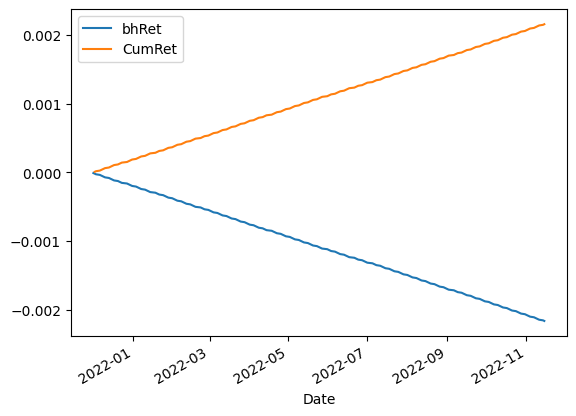

In [ ]:
plot_return(model_tlt,X_test,y_test)

## Step 3

In [ ]:
ticker_names = ['SPY', 'TLT', 'SHY', 'GLD', 'DBO']

In [ ]:
ticker_weights = {'SPY':1/len(ticker_names), 'TLT':1/len(ticker_names), 'SHY':1/len(ticker_names),
                  'GLD':1/len(ticker_names), 'DBO':1/len(ticker_names)}

In [ ]:
ticker_predictions = {'SPY':y_spy_pred , 'TLT':1/len(ticker_names), 'SHY':1/len(ticker_names),
                  'GLD':1/len(ticker_names), 'DBO':1/len(ticker_names)}

In [ ]:
models = [model_spy, model_dbo,model_gld, model_tlt,model_shy]
positions_df = pd.DataFrame()
values_df = pd.DataFrame()
for model in models:
  y_pred= model.predict(X_test)
  y_pred=pd.Series(y_pred.reshape(y_pred.shape[0]))
  values_df['model'] = y_pred.values
  positions_df['model'] = y_pred.apply(np.sign)


8/8 [==============================] - 0s 4ms/step


In [ ]:
model.name

'sequential'

In [ ]:
y_pred

0      0.001312
1      0.001312
2      0.001312
3      0.001312
4      0.001312
         ...   
237    0.001313
238    0.001313
239    0.001312
240    0.001312
241    0.001312
Length: 242, dtype: float32

In [ ]:
def plot_combines_return(model,X_test,y_test):
  y_pred= model.predict(X_test)
  y_pred=pd.Series(y_pred.reshape(y_pred.shape[0]))
  df_predictions=pd.DataFrame()
  df_predictions["values"]=y_pred
  df_predictions['Date']=y_test.index
  df_predictions["Positions"] = y_pred.apply(np.sign)
  df_predictions["Strat_ret"] = (
      df_predictions["Positions"].shift(1) * df_predictions["values"]
  )
  df_predictions["CumRet"] = (
      df_predictions["Strat_ret"].expanding().apply(lambda x: np.prod(1 + x) - 1)
  )
  df_predictions["bhRet"] = (
      df_predictions["values"].expanding().apply(lambda x: np.prod(1 + x) - 1)
  )

  Final_Return = np.prod(1 + df_predictions["Strat_ret"]) - 1
  Buy_Return = np.prod(1 + df_predictions["values"]) - 1

  print("Strat Return =", Final_Return * 100, "%")
  print("Buy and Hold Return =", Buy_Return * 100, "%")


  ax = plt.gca()
  df_predictions.plot(x="Date", y="bhRet", ax=ax)
  df_predictions.plot(x="Date", y="CumRet", ax=ax)
  plt.show()

## Step 4